# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

Trend 1: Of the variables we investigated, maximum temperature seems to have highest correlation with latitude, as latitude increases from negative to 0, the maximum temperature in in the cities in interest gradually increases; as latitude goes from 0 to 80, maximum temperature decreases (sharp decrease in maximum temperature (from around 90 F to nearly 5 F) as latitude increases from 20 to 80).

Trend 2: There is no obvious trend between cloudiness and latitute and humidity and latitude, there are no observable clusters in the two scatter plots nor trends in change in cloudiness and humdity as the latitude varies. It appears that latitude is not a strong predictor of either cloudiness or humidity.

Trend 3: There is an observable trend between wind speed and latitude, however the correlation is not as high as that between temperature and latitude. The farther away from the equator (0 degree in latitude), the higher the wind speed tends to occur.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "abe65d8118fd13b4f6c871b633350ea9"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

lat_lngs = []
cities = []

In [5]:
# Create empty lists for the variables in interest
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_speed = []

# Set up counters for the print log
record = 1
se = 1

# Set up initial statement for print log
print("Beiginning Data Retrival\n")
print("---------------------------\n")

# While loop to ensure the total number of cities selected is larger than 500
while len(City)<= 500:
    
    # Random sampling of latitude and longitude
    lats = np.random.uniform(low=-90.000, high=90.000, size=300)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=300)
    lat_lngs = zip(lats, lngs)
    
    # Select nearest city using citipy
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
            
            #Perform a weather check on each city using a series of successive API call
            weather_city = requests.get(query_url+city+"&units=imperial").json()
            
            # Add variables in corresponding lists
            if "name" in weather_city:
                City.append(weather_city["name"])
                Cloudiness.append(weather_city["clouds"]["all"])
                Country.append(weather_city["sys"]["country"])
                Date.append(weather_city["dt"])
                Humidity.append(weather_city["main"]["humidity"])
                Lat.append(weather_city["coord"]["lat"])
                Lng.append(weather_city["coord"]["lon"])
                Max_temp.append(weather_city["main"]["temp_max"])
                Wind_speed.append(weather_city["wind"]["speed"])
            
                #print log as processed
                print(f"Processing Record {record} of Set {se} | {city}")
                record += 1
                if len(City)>49 *se +se-1:
                    se += 1
                    record = 1
            else: print("City not found. Skipping...")
print("-----------------------------\n")
print("Data Retrival End\n")
print("------------------------------\n")

Beiginning Data Retrival

---------------------------

Processing Record 1 of Set 1 | iquique
Processing Record 2 of Set 1 | lamu
Processing Record 3 of Set 1 | qazvin
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | corn island
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | lakes entrance
City not found. Skipping...
Processing Record 9 of Set 1 | kvarkeno
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | dire dawa
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | alugan
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | issoire
Processing Record 16 of Set 1 | buraydah
Processing Record 17 of Set 1 | kabo
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | veraval
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | isangel
Processing Record 23 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary for the variables in interest
city_data = {"City":City,
             "Cloudiness":Cloudiness,
             "Country":Country,
             "Date":Date,
             "Humidity":Humidity,
             "Lat":Lat,
             "Lng":Lng,
             "Max Temp":Max_temp,
             "Wind Speed":Wind_speed}

# Convert the dictionary into a data frame
city_data = pd.DataFrame(city_data)

#Check if selected more than 500 cities
print(city_data.info())

#Check if the cities selected are unique and more than 500 
print(len(city_data["City"].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 9 columns):
City          557 non-null object
Cloudiness    557 non-null int64
Country       557 non-null object
Date          557 non-null int64
Humidity      557 non-null int64
Lat           557 non-null float64
Lng           557 non-null float64
Max Temp      557 non-null float64
Wind Speed    557 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.2+ KB
None
557


In [7]:
#Preview of the data frame
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iquique,75,CL,1571019730,72,-20.22,-70.14,64.40,3.36
1,Lamu,0,CN,1571019730,60,35.77,102.37,44.55,4.11
2,Qazvin,30,IR,1571019731,93,36.28,50.01,46.40,2.24
3,Saskylakh,78,RU,1571019731,94,71.97,114.09,19.08,3.27
4,Nanortalik,0,GL,1571019506,86,60.14,-45.24,34.09,14.39


In [8]:
city_data.to_csv(output_data_file,header = True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

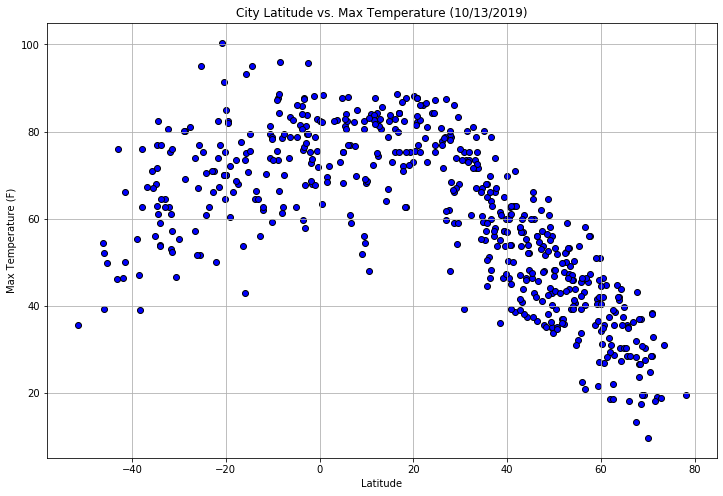

In [25]:
plt.figure(figsize = (12,8))
plt.scatter(city_data["Lat"], city_data["Max Temp"],alpha = 1, 
                         facecolor = "blue", edgecolor = "black")
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/13/2019)")

plt.show()

In [24]:
plt.savefig("../plots/City Latitude vs. Max Temperature.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

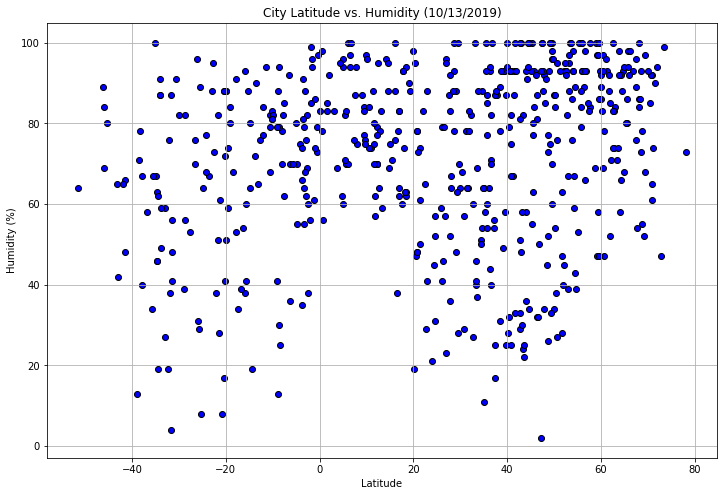

In [26]:
plt.figure(figsize = (12,8))
plt.scatter(city_data["Lat"], city_data["Humidity"],alpha = 1, 
                         facecolor = "blue", edgecolor = "black")
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (10/13/2019)")

plt.show()

In [28]:
plt.savefig("../plots/City Latitude vs. Humidity.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

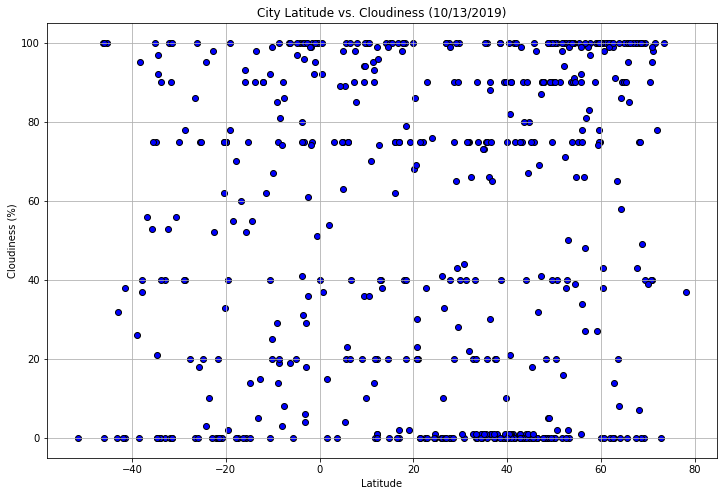

In [31]:
plt.figure(figsize = (12,8))
Lat_v_cloud = plt.scatter(city_data["Lat"], city_data["Cloudiness"],alpha = 1, 
                         facecolor = "blue", edgecolor = "black")
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (10/13/2019)")

plt.show()

In [30]:
plt.savefig("../plots/City Latitude vs. Cloudiness.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

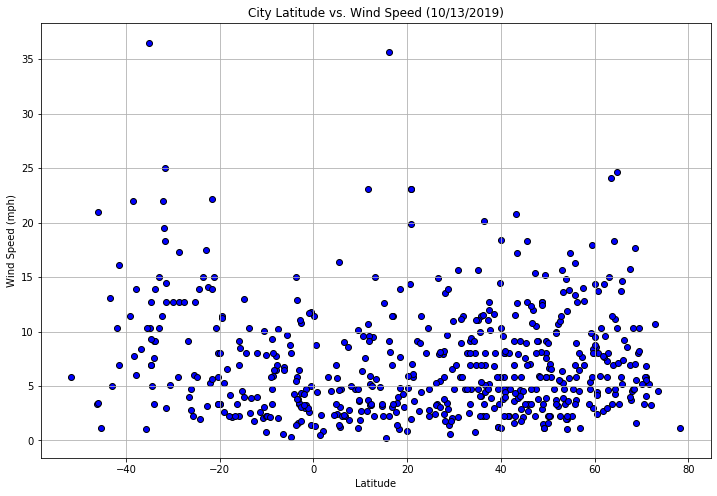

In [32]:
plt.figure(figsize = (12,8))
Lat_v_temp = plt.scatter(city_data["Lat"], city_data["Wind Speed"],alpha = 1, 
                         facecolor = "blue", edgecolor = "black")
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/13/2019)")

plt.show()

In [33]:
plt.savefig("../plots/City Latitude vs. Wind Speed.png")

<Figure size 432x288 with 0 Axes>